<a href="https://colab.research.google.com/github/MehrNoushR/solutions/blob/main/Co2_emissions2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the dataset
df = pd.read_csv('co2_emissions.csv' , header=[0, 1])

# Display the first few rows to inspect its structure
df.head()

,Country,1990,2005,2017,2021
,World,22674.120,30049.810,37077.400,37857.580
0,World – International Aviation,258.941,422.777,543.381,NaN
1,World – International Shipping,371.804,572.169,677.248,NaN
2,Afghanistan,2.546,1.063,11.422,8.35
3,Albania,6.583,4.196,5.026,4.59
4,Algeria,65.677,98.197,159.929,173.00


In [4]:
# Rename columns
df.columns = [' '.join(col).strip() for col in df.columns.values]

# Display the first few rows after renaming
df.head()


,Country World,1990 22674.120,2005 30049.810,2017 37077.400,2021 37857.580
0,World – International Aviation,258.941,422.777,543.381,NaN
1,World – International Shipping,371.804,572.169,677.248,NaN
2,Afghanistan,2.546,1.063,11.422,8.35
3,Albania,6.583,4.196,5.026,4.59
4,Algeria,65.677,98.197,159.929,173.00


In [18]:
# Rename columns to appropriate labels
corrected_columns = {
    'Country World' : 'Country',
    '1990 22674.120' : '1990' ,
    '2005 30049.810' : '2005' ,
    '2017 37077.400' : '2017' ,
    '2021 37857.580' : '2021'
}
df.rename(columns=corrected_columns, inplace=True)

# Remove non-country rows
# We can identify non-country rows
# by checking if the "Country" name contains "World"
df_countries = df[~df['Country'].str.contains("World")]

# Display the cleaned dataframe
df_countries.head()


,Country,1990,2005,2017,2021
2,Afghanistan,2.546,1.063,11.422,8.35
3,Albania,6.583,4.196,5.026,4.59
4,Algeria,65.677,98.197,159.929,173.00
5,Angola,5.851,15.975,30.876,24.45
6,Anguilla,0.006,0.014,0.028,0.03


For Graph 1 (CO2 emissions of the top 2 CO2 producers):

*   We will first sort countries based on their latest CO2 emission data (2021).

*   Then, selecting the top 5 en finally, plot their CO2 emissions for the years
1990, 2005, 2017 and 2021.





In [19]:
# Sort the dataframe based on 2021 CO2 emissions and select the top 5 countries
top5_2021 = df_countries.sort_values(by='2021', ascending=False).head(5)

In [20]:
top5_2021

,Country,1990,2005,2017,2021
41,China,2397.050,6263.06,10877.22,12466.32
201,United States,5085.900,5971.57,5107.39,4752.08
66,European Union,4409.340,4250.00,3548.35,2774.93
92,India,605.968,1210.75,2454.77,2648.78
157,Russia,2378.920,1733.95,1764.87,1942.54


Text(0.5, 1.0, 'Top 5 CO2 Producers (1990, 2005, 2017, 2021)')

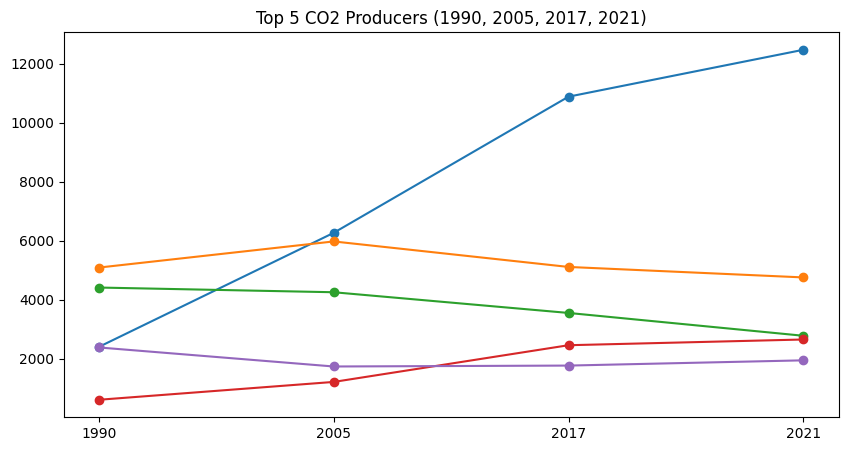

In [24]:
# Plot their CO2 emissions for the specified years
plt.figure(figsize=(10, 5))
for index, row in top5_2021.iterrows():
  plt.plot(['1990', '2005', '2017', '2021'], row[['1990', '2005', '2017', '2021']], label=row['Country'], marker='o')
plt.title("Top 5 CO2 Producers (1990, 2005, 2017, 2021)")

Graph 2: Calculated the relative change in emissions and plot the results for the top three and bottom three countries.

In [25]:
# Calculate the relative change for each year based on the 1990 emissions
df_countries['rel_2005'] = (df_countries['2005'] / df_countries['1990']) * 100
df_countries['rel_2017'] = (df_countries['2017'] / df_countries['1990']) * 100
df_countries['rel_2021'] = (df_countries['2021']/ df_countries['1990']) * 100

In [26]:
# Calculate countries based on the overall change from 1990 to 2021
df_countries['overall_change'] = df_countries['rel_2021'] - 100

In [27]:
# Sort countries based on the overall change
sorted_countries= df_countries.sort_values(by='overall_change', ascending=False)

In [28]:
# Select top 3 and bottom 3 countries
top3_changers = sorted_countries.head(3)
bottom3_changers = sorted_countries.tail(3)

In [29]:
top3_changers, bottom3_changers

(               Country   1990   2005   2017   2021      rel_2005  \
 80           Greenland  0.003  0.631  0.518   0.46  21033.333333   
 108               Laos  0.211  1.038  2.818  20.56    491.943128   
 61   Equatorial Guinea  0.097  3.371  2.469   7.00   3475.257732   
 
          rel_2017      rel_2021  overall_change  
 80   17266.666667  15333.333333    15233.333333  
 108   1335.545024   9744.075829     9644.075829  
 61    2545.360825   7216.494845     7116.494845  ,
      Country     1990     2005     2017    2021   rel_2005   rel_2017  \
 9    Armenia   20.699    4.542    4.832    6.77  21.943089  23.344123   
 127  Moldova   31.957    8.139    8.263    9.55  25.468598  25.856620   
 198  Ukraine  783.210  354.429  205.723  185.46  45.253380  26.266646   
 
       rel_2021  overall_change  
 9    32.706894      -67.293106  
 127  29.883906      -70.116094  
 198  23.679473      -76.320527  )

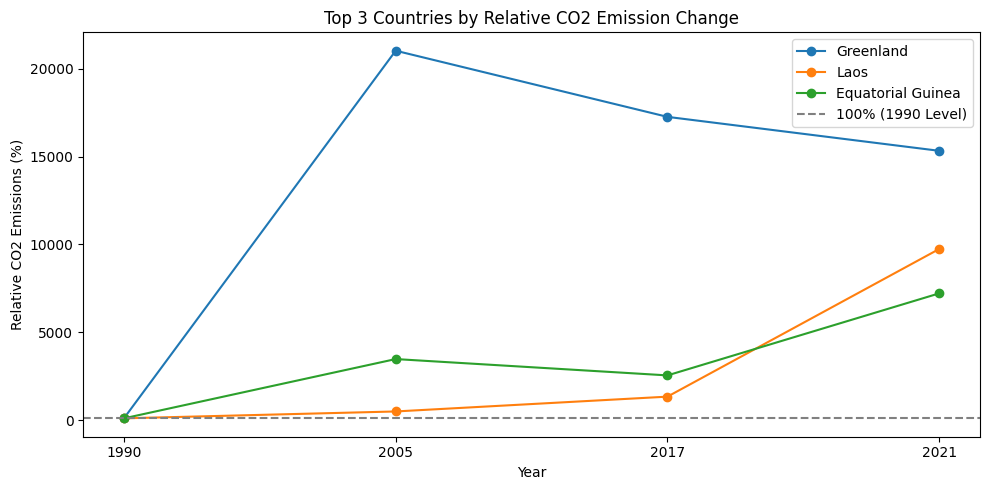

In [31]:
# Plot for top 3 changers
plt.figure(figsize=(10,5))
for index, row in top3_changers.iterrows():
  plt.plot(['1990', '2005', '2017','2021'], [100, row['rel_2005'], row['rel_2017'], row['rel_2021']],
         label=row['Country'], marker='o')

plt.axhline(100, color='grey', linestyle='--', label="100% (1990 Level)")
plt.title("Top 3 Countries by Relative CO2 Emission Change")
plt.xlabel("Year")
plt.ylabel("Relative CO2 Emissions (%)")
plt.legend()
# plt.grid(True, which="both", Is="- -", c='0.7')
plt.tight_layout()
plt.show()

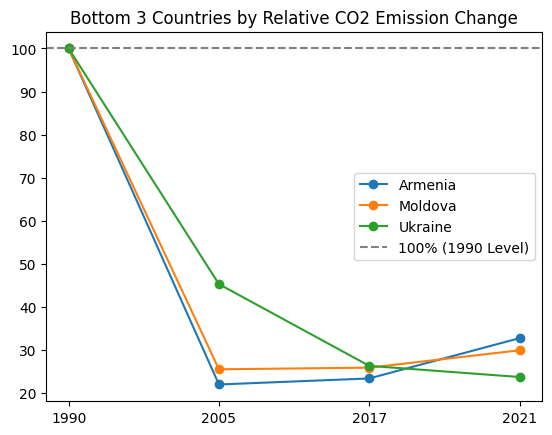

In [43]:
# Plot for bottom 3 changers
for index, row in bottom3_changers.iterrows():
  plt.plot(['1990', '2005', '2017', '2021'], [100, row['rel_2005'], row['rel_2017'], row['rel_2021']],
          label=row['Country'], marker='o')

plt.axhline(100, color='grey', linestyle='--', label="100% (1990 Level)")
plt.title("Bottom 3 Countries by Relative CO2 Emission Change")
plt.legend()

Further refine Graph 2 for countries with emissions of at least five Mt in 1990

In [44]:
# Filter countries with at least 5 Mt of CO2 emissions in 1990
filtered_countries = df_countries[df_countries['1990'] >=5]

# Sort these countries based on the overall relative change
sorted_filtered_countries = filtered_countries.sort_values(by='overall_change', ascending=False)

In [45]:
# Select top 3 and bottom 3 countries from the filtered list
top3_filtered_changers = sorted_filtered_countries.head(3)
bottom3_filtered_changers = sorted_filtered_countries.tail(3)

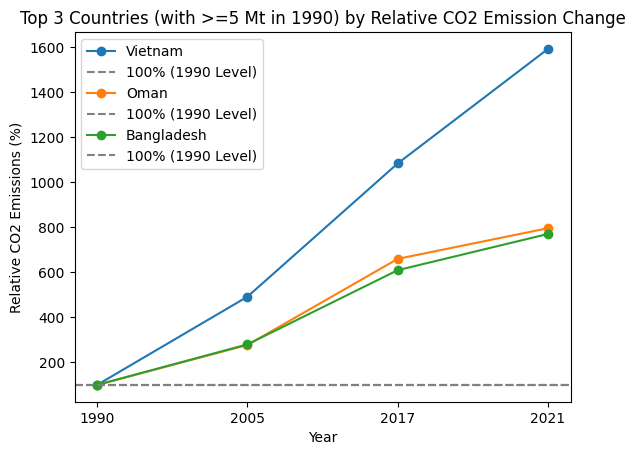

In [49]:
# Plot for top 3 changers
for index, row in top3_filtered_changers.iterrows():
    plt.plot(['1990','2005','2017','2021'], [100, row['rel_2005'],
                                                      row['rel_2017'],
                                             row['rel_2021']],
             label=row['Country'], marker='o')
    plt.axhline(100, color='grey', linestyle='--', label="100% (1990 Level)")
    plt.title("Top 3 Countries (with >=5 Mt in 1990) by Relative CO2 Emission Change")
    plt.xlabel("Year")
    plt.ylabel("Relative CO2 Emissions (%)")
    plt.legend()

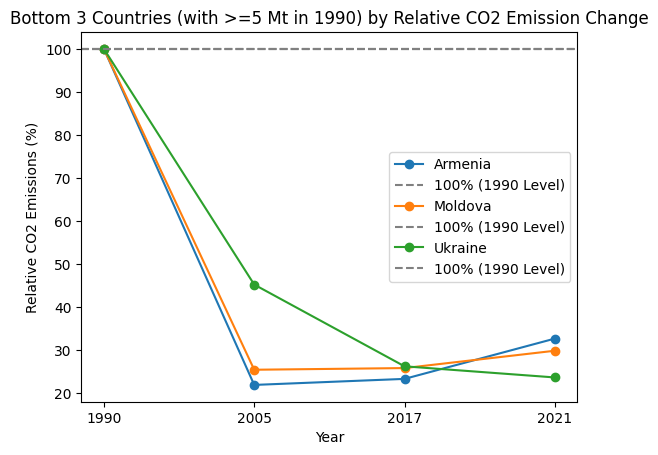

In [54]:
# Plot for bottom 3 changers
for index, row in bottom3_filtered_changers.iterrows():
  plt.plot(['1990', '2005', '2017', '2021'], [100, row['rel_2005'], row['rel_2017'], row['rel_2021']],
           label=row['Country'], marker='o')

  plt.axhline(100, color='grey', linestyle='--', label="100% (1990 Level)")
  plt.title("Bottom 3 Countries (with >=5 Mt in 1990) by Relative CO2 Emission Change")
  plt.xlabel("Year")
  plt.ylabel("Relative CO2 Emissions (%)")
  plt.legend()